Topic Modelling and Sentiment Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re

In [2]:
# inbuilt modules
from extract_dataframe import ExtractTweets
from clean_tweets_dataframe import TweetCleanser

In [3]:
# dataframe from extracted tweets
extracted_tweets = ExtractTweets("data/Economic_Twitter_Data.json")
df = extracted_tweets.get_tweet_df(save=False)


Preprocessing Tasks

In [4]:
# clean the dataframe
cleanser = TweetCleanser(df)
# drop unwanted columns
cleanser.drop_unwanted_column(df)
# drop duplicate values from original text
cleanser.drop_duplicate(df)
# convert date data to appropriate datetime
cleanser.convert_to_datetime(df)
# remove non english texts
df_ = cleanser.remove_non_english_tweets(df)

Automation in Action...!!!


In [5]:
df_.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
38,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,188,43,davideiacovozzi,18,55,None,"[{'text': 'gold', 'indices': [116, 121]}, {'te...",NaN,
39,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,179,32,davideiacovozzi,18,55,None,[],NaN,
41,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,193,26,davideiacovozzi,18,55,False,[],NaN,
42,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,620,213,davideiacovozzi,18,55,None,[],NaN,
43,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,1787,417,davideiacovozzi,18,55,False,[],NaN,


In [6]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15180 entries, 38 to 24622
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          15180 non-null  datetime64[ns, UTC]
 1   source              15180 non-null  object             
 2   original_text       15180 non-null  object             
 3   polarity            15180 non-null  float64            
 4   subjectivity        15180 non-null  float64            
 5   lang                15180 non-null  object             
 6   favorite_count      15180 non-null  int64              
 7   retweet_count       15180 non-null  int64              
 8   original_author     15180 non-null  object             
 9   followers_count     15180 non-null  int64              
 10  friends_count       15180 non-null  int64              
 11  possibly_sensitive  6057 non-null   object             
 12  hashtags            15180 non-n

In [7]:
# checking for any missing values from the data
missing_values = df_.isnull().sum().sum()


In [8]:
missing_values

24303

In [9]:
# check the columns that have values
columns_with_null_values = df_.columns[df_.isnull().any()]

In [10]:
columns_with_null_values

Index(['possibly_sensitive', 'user_mentions'], dtype='object')

In [11]:
# univariate analysis on hashtags
def get_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [12]:
# apply the method to the text
df_['hashtags'] = df_['original_text'].apply(get_hashtags)

In [13]:
# we can take the rows that have valid hashtags
hashtags = df_[df_['hashtags'].map(lambda x: len(x)) > 0]

In [14]:
# how many records have hashtags
len(hashtags)

4829

In [15]:
# we can flatten the hashtags
flattened_hash_dataframes = pd.DataFrame(
    [hashtag for hashtags_list in hashtags.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [16]:
# we can add it to the main dataframe
df_['all_hashtags'] = flattened_hash_dataframes

<AxesSubplot:>

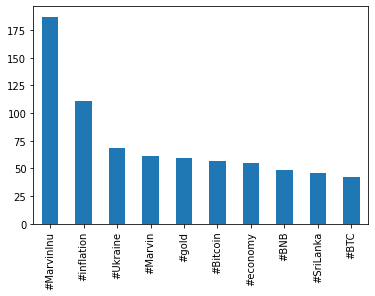

In [17]:
# we can plot the top 10 hashtags
df_['all_hashtags'].value_counts()[:10].plot(kind='bar')

In [18]:
# plotting tweets by language
# first of all get the tweets by language
tweets_df = pd.DataFrame(columns = ['original_text','lang'])
tweets_df['text'] = df_['original_text'].to_list()
tweets_df['lang'] = df_['lang'].to_list()
tweets_according_language = tweets_df['lang'].value_counts()